In [10]:
import librosa as librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline
import librosa.display
from IPython.display import Audio
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import splitfolders
import skimage.io

/tmp/ipykernel_74570/729025729.py:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr= sr, x_axis='s')


The sampled audio is returned as a numpy array (time series) and has  (124088,)  number of samples
The 10 randomly picked consequitive samples of the audio are:  [ 7.0924056e-05 -4.8090980e-05 -9.9032350e-06 -7.5890901e-05
 -2.2591242e-04 -2.3714930e-04 -2.1611439e-04 -2.6529102e-04
 -3.5076195e-04 -3.6923023e-04]


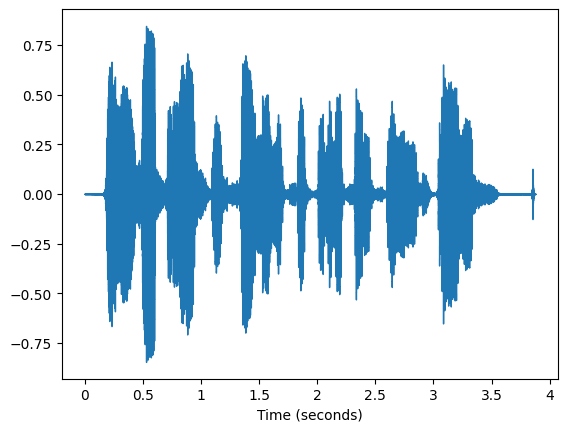

In [11]:
y, sr = librosa.load('test5.wav', sr=32000)
librosa.display.waveshow(y, sr= sr, x_axis='s')
print("The sampled audio is returned as a numpy array (time series) and has ", y.shape, " number of samples")
print("The 10 randomly picked consequitive samples of the audio are: ", y[3000:3010])

In [12]:
Audio('test5.wav')

In [13]:
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=320

# Specify the window type for FFT/STFT
window_type ='hann'

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

print("The shape of spectrogram_librosa is: ", spectrogram_librosa.shape)
print("The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])")
print("The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft",n_fft, " samples")
print("The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.")

The shape of spectrogram_librosa is:  (513, 388)
The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])
The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft 1024  samples
The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.


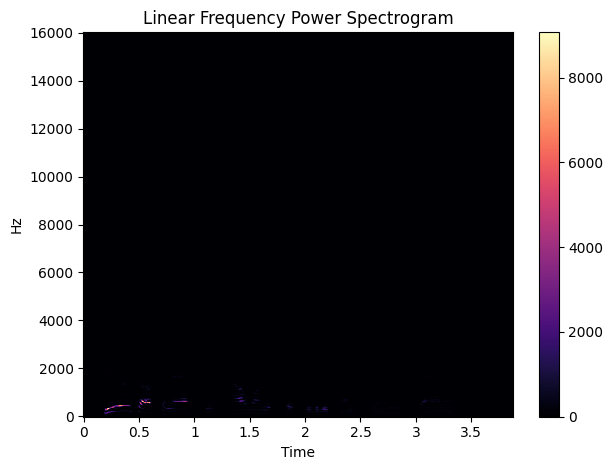

In [14]:
librosa.display.specshow(spectrogram_librosa, sr=sr, x_axis='time', y_axis='linear',hop_length=hop_length)
plt.title('Linear Frequency Power Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

The shape of Log Mel spectrogram is:  (128, 243)


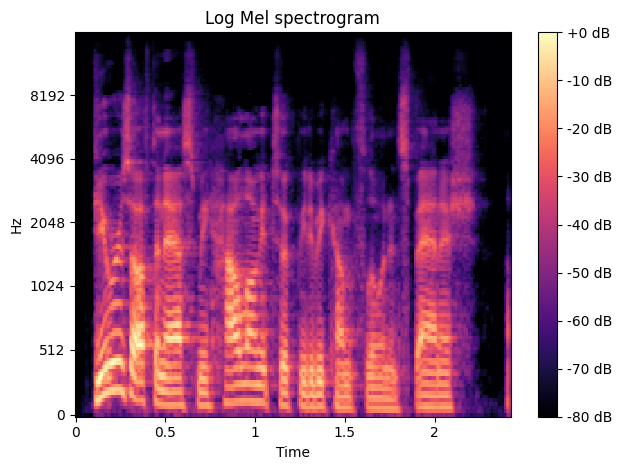

In [15]:
Mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
print("The shape of Log Mel spectrogram is: ", mel_spectrogram_db.shape)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()

wrote file out.png


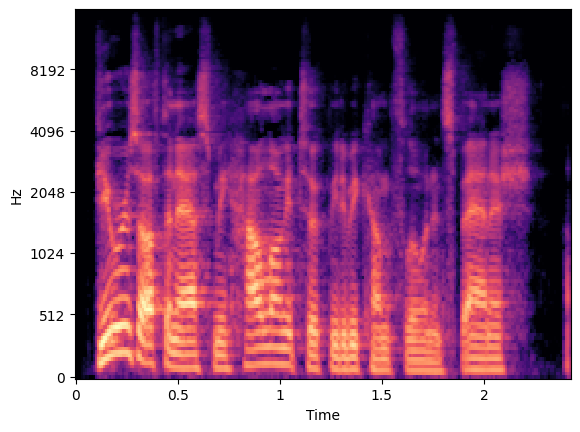

In [16]:
##### TO SAVE THE PLOT #####
# METHOD 1
fig = plt.Figure(figsize=(8,8), dpi=128, frameon=False)
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
fig.savefig('./'+str(1)+'.png', bbox_inches='tight', pad_inches=0, dpi=128)


# METHOD 2
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(mel_spectrogram_db, out):

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mel_spectrogram_db , 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(out, img)

# convert to PNG
out = 'out.png'
spectrogram_image(mel_spectrogram_db, out=out)
print('wrote file', out)

In [17]:
#### save as .npy
with open('logMel.npy', 'wb') as f:
    np.save(f,mel_spectrogram_db)
    
# Load the saved data as a confirmation  
with open('logMel.npy', 'rb') as f:
    a = np.load(f)
    print(a.shape)
    print(a)

####save as a.txt file
np.savetxt('logMel.out', mel_spectrogram_db, delimiter=',') # takes more space compared to saving as .npy

(128, 243)
[[-80.       -80.       -80.       ... -56.125107 -45.159256 -47.52748 ]
 [-80.       -80.       -80.       ... -42.029045 -37.32118  -42.397118]
 [-80.       -80.       -80.       ... -32.866135 -30.061966 -38.256893]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


In [18]:
mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=40, fmin=0.0, fmax=None, htk=False, norm='slaney')
print("The shape of the mel filter bank is: ", mel_filter_bank.shape)
librosa.display.specshow(mel_filter_bank, sr=sr, x_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel filter bank')
plt.tight_layout()
plt.show()

NameError: name 'mel_bins' is not defined